# Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
X_train = pd.read_csv("data/X_train.csv", index_col=0)
y_train = pd.read_csv("data/y_train.csv", index_col=0).squeeze()

In [3]:
X_train.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer
80307,0.457839,47,0.0,0.046115,67743.0,12,0.0,1,0.0,0.0,0
30226,0.009027,52,0.0,0.477691,6790.0,16,0.0,2,0.0,0.0,0
133736,0.999900,47,2.0,0.226398,7583.0,4,0.0,1,0.0,2.0,0
37286,0.190475,59,1.0,0.320860,6466.0,6,0.0,1,0.0,1.0,0
6148,0.204319,38,0.0,0.331111,6000.0,14,0.0,2,0.0,2.0,0


In [4]:
X_train["LogMonthlyIncome"] = np.log(X_train["MonthlyIncome"]+1)

<Axes: xlabel='LogMonthlyIncome', ylabel='Count'>

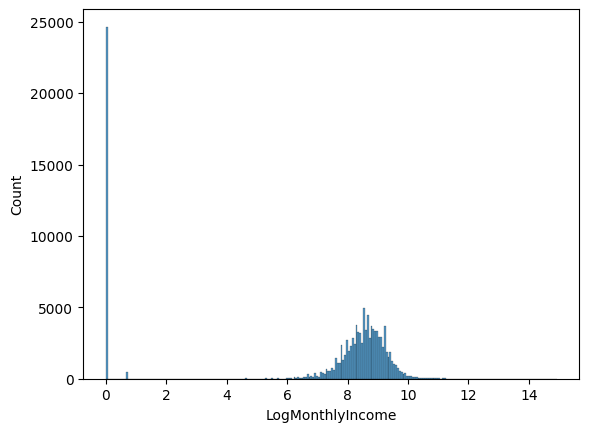

In [5]:
sns.histplot(data=X_train, x="LogMonthlyIncome")

In [6]:
X_train["LogLogRevolvingUtilizationOfUnsecuredLines"] = np.log(np.log(X_train["RevolvingUtilizationOfUnsecuredLines"]+1)+1)

<Axes: xlabel='LogLogRevolvingUtilizationOfUnsecuredLines', ylabel='Count'>

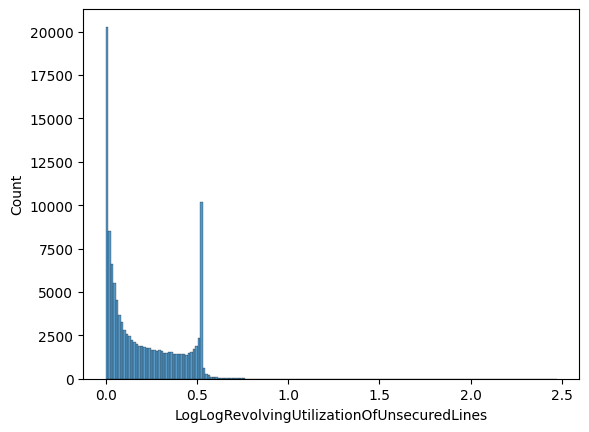

In [7]:
sns.histplot(data=X_train, x="LogLogRevolvingUtilizationOfUnsecuredLines")

In [8]:
X_train["LogDebtRatio"] = np.log(X_train["DebtRatio"]+1e-05)

<Axes: xlabel='LogDebtRatio', ylabel='Count'>

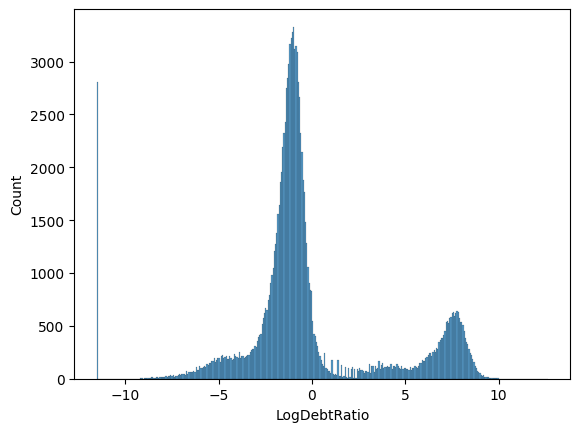

In [9]:
sns.histplot(data=X_train, x="LogDebtRatio")

# 1. Logistic Regression Modelling

## (1a) Standardizing

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
# Convert X_train & X_test
def scaler_transform(data, scaler):
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled)
    data_scaled.columns = data.columns
    data_scaled.index = data.index

    return data_scaled

In [12]:
X_train_scaled = scaler_transform(data = X_train,
                                  scaler = scaler)

In [13]:
X_train_scaled

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,TypeCustomer,LogMonthlyIncome,LogLogRevolvingUtilizationOfUnsecuredLines,LogDebtRatio
80307,-0.022665,-0.359114,-0.352441,-0.232311,4.359262,0.684016,-0.185818,-0.020921,-0.196823,-0.667284,-0.492793,1.228830,0.563201,-0.735964
30226,-0.024498,-0.019155,-0.352441,-0.232021,0.097846,1.462043,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.579399,-0.953422,-0.144244
133736,-0.020451,-0.359114,2.515175,-0.232190,0.153287,-0.872036,-0.185818,-0.020921,-0.196823,1.136102,-0.492793,0.610582,1.571355,-0.333241
37286,-0.023757,0.456787,1.081367,-0.232126,0.075194,-0.483023,-0.185818,-0.020921,-0.196823,0.234409,-0.492793,0.565596,-0.213128,-0.244976
6148,-0.023700,-0.971039,-0.352441,-0.232120,0.042615,1.073030,-0.185818,0.860418,-0.196823,1.136102,-0.492793,0.544481,-0.165341,-0.237015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29359,-0.023640,0.660762,-0.352441,-0.232025,0.112528,6.713719,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.587998,-0.115295,-0.147544
85572,-0.020450,0.864737,-0.352441,-0.232341,0.118331,-1.261049,-0.185818,-0.902261,-0.196823,-0.667284,-0.492793,0.591325,1.571499,-2.184042
118251,-0.024535,2.768504,-0.352441,-0.226981,-0.376864,-1.261049,-0.185818,-0.902261,-0.196823,-0.667284,2.029248,-1.911825,-0.997062,0.569123
95767,-0.021054,0.048836,-0.352441,-0.231911,-0.046734,0.684016,-0.185818,0.860418,-0.196823,-0.667284,-0.492793,0.476864,1.344946,-0.069429


## (1b) Undersampling

In [14]:
from imblearn.under_sampling import RandomUnderSampler

In [15]:
rus = RandomUnderSampler(sampling_strategy = 0.3,
                         random_state = 20230703)

In [16]:
X_res, y_res = rus.fit_resample(X_train_scaled, y_train)

In [17]:
# Import library
from sklearn.linear_model import LogisticRegression

In [18]:
# Assigning weight to Approved & Rejected credit
n_samples = len(y_res)
n_classes = len(y_res.value_counts())
n_samples_j = y_res.value_counts()

class_weight = n_samples / (n_classes * n_samples_j)
class_weight

SeriousDlqin2yrs
0    0.650000
1    2.166667
Name: count, dtype: float64

In [19]:
logreg = LogisticRegression(class_weight = dict(class_weight),
                            solver = "liblinear",
                            random_state = 20230703)

In [20]:
# hyperparameter search
from sklearn.model_selection import GridSearchCV

search_params = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-5, 5, 20)}

logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = search_params,
                         cv = 5)

In [21]:
logreg_cv.fit(X = X_res,
              y = y_res)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 0.65,
                                                        1: 2.1666666666666665},
                                          random_state=20230703,
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [22]:
logreg_cv.best_params_

{'C': 0.5455594781168515, 'penalty': 'l1'}

In [23]:
# best model
logreg_best = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                                 C = logreg_cv.best_params_["C"],
                                 class_weight = dict(class_weight),
                                 solver = "liblinear",
                                 random_state = 20230703)

# logreg_personal_best = LogisticRegression(solver = "liblinear",
#                                           random_state = 20230703)

# Fit model
logreg_best.fit(X_res, y_res)

LogisticRegression(C=0.5455594781168515,
                   class_weight={0: 0.65, 1: 2.1666666666666665}, penalty='l1',
                   random_state=20230703, solver='liblinear')

In [24]:
logreg_best.coef_

array([[-0.38403149, -0.27950472,  0.39604509, -0.05292861, -0.24098179,
         0.178427  ,  0.52299933,  0.15684714,  0.32809351,  0.02229547,
        -0.05842351, -0.16764379,  0.80990708, -0.1947062 ]])

In [25]:
y_train_pred_proba = logreg_best.predict_proba(X_train_scaled)

In [26]:
y_train_pred_proba

array([[0.80522812, 0.19477188],
       [0.80912116, 0.19087884],
       [0.20859341, 0.79140659],
       ...,
       [0.94134427, 0.05865573],
       [0.42666648, 0.57333352],
       [0.92380525, 0.07619475]])

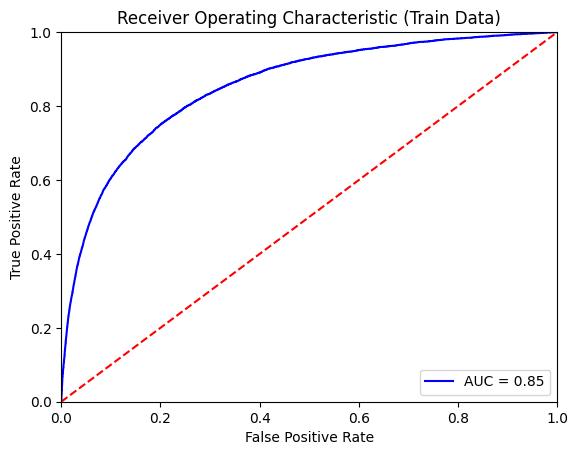

In [27]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,
                                         y_train_pred_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic (Train Data)')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Performance in Test Data

In [28]:
X_test = pd.read_csv("data/X_test.csv", index_col=0)
y_test = pd.read_csv("data/y_test.csv", index_col=0).squeeze()

X_test["LogMonthlyIncome"] = np.log(X_test["MonthlyIncome"]+1)

X_test["LogLogRevolvingUtilizationOfUnsecuredLines"] = np.log(np.log(X_test["RevolvingUtilizationOfUnsecuredLines"]+1)+1)

X_test["LogDebtRatio"] = np.log(X_test["DebtRatio"]+1e-05)

X_test_scaled = scaler_transform(data = X_test,
                                 scaler = scaler)

y_test_pred_proba = logreg_best.predict_proba(X_test_scaled)

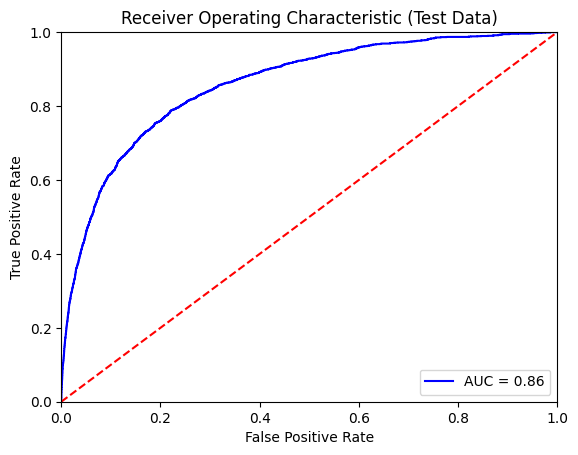

In [29]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_test_pred_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic (Test Data)')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
# Classification report
from sklearn.metrics import classification_report

y_pred_test = (y_test_pred_proba[:,1] >= 0.5)  # for example, threshold = 0.5

print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["Approved", "Rejected"]))

              precision    recall  f1-score   support

    Approved       0.98      0.80      0.88     27877
    Rejected       0.21      0.76      0.33      2002

    accuracy                           0.80     29879
   macro avg       0.60      0.78      0.61     29879
weighted avg       0.93      0.80      0.84     29879



In [31]:
# Export model to pickle

import pickle

# Saving model to pickle file
with open("api/model/model1.pkl", "wb") as file:
    pickle.dump(logreg_best, file)

# Saving scaler to pickle file
with open("api/model/scaler1.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [32]:
# print all coefficients
for i, val in enumerate(logreg_best.coef_.T):
    print(f'{X_train.columns[i]}: {logreg_best.coef_[0,i]}')

RevolvingUtilizationOfUnsecuredLines: -0.3840314873017878
age: -0.27950472190514053
NumberOfTime30-59DaysPastDueNotWorse: 0.39604508671394717
DebtRatio: -0.0529286138497249
MonthlyIncome: -0.24098178628686692
NumberOfOpenCreditLinesAndLoans: 0.17842700494414154
NumberOfTimes90DaysLate: 0.5229993257098962
NumberRealEstateLoansOrLines: 0.15684714352195817
NumberOfTime60-89DaysPastDueNotWorse: 0.3280935134635365
NumberOfDependents: 0.022295465000570315
TypeCustomer: -0.05842351236334499
LogMonthlyIncome: -0.16764379169988508
LogLogRevolvingUtilizationOfUnsecuredLines: 0.8099070825793482
LogDebtRatio: -0.19470619790504778


# Validation for Kaggle submission

In [33]:
X_validation = pd.read_csv("data/cs-test.csv")
X_validation.drop(columns=["Unnamed: 0", "SeriousDlqin2yrs"], 
                  inplace=True)
X_validation.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [34]:
null_income = X_validation["MonthlyIncome"].isna()
X_validation["TypeCustomer"] = np.where(null_income, 1, 0)
# 1 is Business
# 0 is Personal
X_validation["MonthlyIncome"] = X_validation["MonthlyIncome"].fillna(0) # fill 0 income for Business

X_validation["NumberOfDependents"] = X_validation["NumberOfDependents"].fillna(0) # impute missing values

In [35]:
X_validation["LogMonthlyIncome"] = np.log(X_validation["MonthlyIncome"]+1)

X_validation["LogLogRevolvingUtilizationOfUnsecuredLines"] = np.log(np.log(X_validation["RevolvingUtilizationOfUnsecuredLines"]+1)+1)

X_validation["LogDebtRatio"] = np.log(X_validation["DebtRatio"]+1e-05)

X_validation_scaled = scaler_transform(data = X_validation, scaler = scaler)

y_validation_pred_proba = logreg_best.predict_proba(X_validation_scaled)[:,1]

In [36]:
validation_proba = pd.Series(y_validation_pred_proba)
validation_proba.index = pd.RangeIndex(start=1, stop=101504, step=1)

In [37]:
validation_proba.to_csv("data/validation.csv")

In [38]:
validation_proba

1         0.503208
2         0.480613
3         0.159605
4         0.494322
5         0.653372
            ...   
101499    0.385370
101500    0.905806
101501    0.094137
101502    0.512226
101503    0.459534
Length: 101503, dtype: float64